<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Начнем с импорта необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# ЗАгрузим данные
data=pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
# Проверим на дубликаты 
data.duplicated().sum()

153

In [5]:
# Дубликаты имеются, но нам они ни к чему, удалим.
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


In [6]:
# Посмотрим на уникальные значения
data.nunique()

Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64

Видим,что в колонках Зарплата и Возраст тип данных отличается от остальных. В целом, ошибки в этом нет, но для красоты преобразуем тип данных в int. Также поменяем названия колонок на принятый в Python стилю.

In [7]:
#Изменим тип данных
data['Возраст']=data['Возраст'].astype('int64')
data['Зарплата']=data['Зарплата'].astype('int64')

#Поменяем названия
data.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

# Проверим наши изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              4847 non-null   int64
 1   age                 4847 non-null   int64
 2   salary              4847 non-null   int64
 3   family_members      4847 non-null   int64
 4   insurance_payments  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


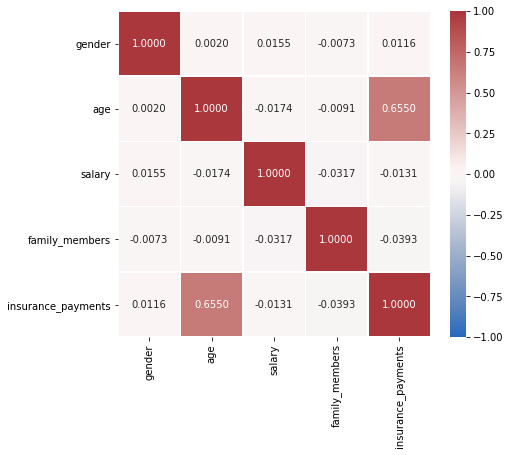

In [8]:
# Проверим корреляцию признаков
plt.figure(figsize=(7, 6))
sns.heatmap(data.corr(), linewidths=.5, cmap='vlag', annot=True, fmt='2.4f', vmin=-1)
plt.show()

Итак, нам дана информация о клиентах компании «Хоть потоп». Данные полные, пропусков нет, дубликаты имеются, но это имеет место быть, однако при таком размере датасета, случайное полное совпадение по всем признакам для разных клиентов будет маловероятным, поэтому считаю уместным удалить дубликаты. Поменяли тип данных для красоты вывода информации, и привели названия колонок к принятому стилю в Python. Наблюдается сильная положительная корреляция между возрастом и выплатами( целевой признак), в остальном, нет никакой зависимости между остальными признаками.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Изменится ли качество линейной регрессии? 

**Ответ:** Нет


**Обоснование:** Нам известно, что признаки: пол, возраст и зарплата застрахованного, количество членов его семьи. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 

Возьмем нашу формулу предсказания и умножим на матрицу $P$ матрицу предсказаний $Х$
$$
a_p = XPw_p
$$
Нам известна формула обучения $w$. Также умножим матрицу признаков на матрицу $P$.
$$
w_p = ((XP)^T XP)^{-1} (XP)^T y
$$
Подставим полученную формулу в исходную и расскроем скобки. Для этого вспомним несколько свойств умножения матриц.
$$
(А*В)^T = В^T * А^T 
$$
$$
(А*В)^{-1} =В^{-1}* А^{-1}
$$
$$
(A*A)^{-1} = А^{-1} * A = E
$$
$$
AE=EA=A
$$
$$
((A)^{-1})^T * A^T = (A*A^{-1})^T = E^T=E
$$
$$
(ABС)^{-1} = ((AB)С)^{-1} = ((AB)С)^{-1} = С^{-1}(AB)^{-1} = С^{-1}B^{-1}A^{-1}
$$          
Теперь применим эти свойства на нашем равенстве
$$
w_p = ((XP)^T XP)^{-1} (XP)^T y = (Р^T(Х^T*Х)Р)^{-1}* Р^T*Х^T*у = Р^{-1}(Х^T*Х)^{-1}(Р^T)^{-1}Р^TХ^Ty 
$$
Исходя из свойств приведенных выше, можно упростить выражение.

$$
(Р^T)^{-1}*Р^T = E
$$
Умножение матрицы на единичную матрицу дает ту же самую матрицу, так что можно наше выражение написать так:
$$
w_p = Р^{-1}(Х^T*Х)^{-1} Х^Ty ,
$$
$$
w = (X^T X)^{-1} X^T y, следовательно
$$
$$
w_p=Р^{-1}w
$$
Вот мы и нашли связь параметров линейной регрессиив исходной задаче и преобразованной. 
Подставим теперь нашу формулу в параметр a:
$$
a_p = XPw_p=XPР^{-1}w
$$
$$
PР^{-1}=E
$$
$$
a_p=Xw=a
$$
Мы доказали, что модель не изменится на теории, теперь попробуем доказать это на практике

## Алгоритм преобразования

**Алгоритм**
Как мы доказали выше, качество модели Линейная Регрессия после умножения исходных признаков на обратимую матрицу не изменится. Соответственно, алгоритм преобразования должен содержать создание обратимой матрицы и ее умножение на матрицу признаков.
$$
С=Х*Р
$$
$$
Х=С*Р^{-1}
$$ 

Где Х - исходные признаки
Р - случайная матрица
С - зашифрованные признаки


Поэтому вот наш алгоритм действий:
- 1. Сгенерируем случайную квадратную матрицу, размеры которой будут равны размерам признаков, т.е. 4х4. Почему именно такую? Потому что для умножения матрицы на вектор должно сохраняться условие: матрица A(mxn) и вектор В(n), где n-ширина матрицы и длина вектора. 
- 2. При сгенерирование матрицы случайным образом, высока вероятность получить необратимую матрицу, но мы создадим функцию, которая сгенерирует матрицу именно обратимой, чтобы не было непредвидимой ошибки.
- 3. Умножим нашу матрицу на признаки.
- 4. Подставим новую переменную в обучение модели.

**Обоснование**
- Почему создаем матрицу с такими размерами? Потому что для умножения матрицы на вектор должно сохраняться условие: матрица A(mxn) и вектор В(n), где n-ширина матрицы и длина вектора. 
- Почему нужна именно необратимая матрица? Потому что при необратимой матрице мы не сможем расшифровать данные, следовательно не сможем выполнить поставленную перед нами задачу, а именно защита персональных данных.

## Проверка алгоритма

In [9]:
# Выделим признаки и целевой признак

features= data.drop('insurance_payments', axis=1)
target=data['insurance_payments']

features_train, features_test, target_train, target_test=train_test_split(features, target, random_state=12345)

In [10]:
# Обучим модель Линейной Регрессии

model= LinearRegression()
model.fit(features_train, target_train)
predicted=model.predict(features_test)
r2_before = r2_score(target_test, predicted)

print('Значение R2 до преобразования', r2_before)

Значение R2 до преобразования 0.42307727615837565


In [11]:
# Сгенерируем матрицу и сразу исключим ошибки необратимости.
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.drop('insurance_payments', axis=1).shape[1], data.drop('insurance_payments', axis=1).shape[1]))
        det = np.linalg.det(matrix)
    return matrix
matrix=get_rand_matrix()

In [13]:
# Умножим нашу случайную матрицу на параметры
features_train_matrix=features_train@matrix
features_test_matrix=features_test@matrix
# Проверим на показателях
model_after=LinearRegression()
model_after.fit(features_train_matrix, target_train)
predicted_after=model_after.predict(features_test_matrix)
r2_after=r2_score(target_test, predicted_after)
print('Значение R2 после преобразования', r2_after)

Значение R2 после преобразования 0.42307727615814616


In [14]:
# Сравним наши значения
r2_before.round(12) == r2_after.round(12) 

True

**Вывод**: Наша модель разработана корректно: метод преобразования данных работает так, что по ним было сложно восстановить персональную информацию. Показания метрики R2 до и после преобразования равны. Данные защищены, при этом качество модели не пострадало.